# CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [2]:
# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize the images
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

# Reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# One-hot encode the labels
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(train_X, train_y, epochs=10, batch_size=128, validation_split=0.1, verbose=2)


Epoch 1/10
422/422 - 17s - loss: 0.3695 - accuracy: 0.8857 - val_loss: 0.0678 - val_accuracy: 0.9802 - 17s/epoch - 39ms/step
Epoch 2/10
422/422 - 15s - loss: 0.1223 - accuracy: 0.9639 - val_loss: 0.0448 - val_accuracy: 0.9863 - 15s/epoch - 36ms/step
Epoch 3/10
422/422 - 16s - loss: 0.0925 - accuracy: 0.9718 - val_loss: 0.0404 - val_accuracy: 0.9887 - 16s/epoch - 38ms/step
Epoch 4/10
422/422 - 15s - loss: 0.0777 - accuracy: 0.9768 - val_loss: 0.0404 - val_accuracy: 0.9887 - 15s/epoch - 36ms/step
Epoch 5/10
422/422 - 16s - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0310 - val_accuracy: 0.9910 - 16s/epoch - 37ms/step
Epoch 6/10
422/422 - 16s - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0323 - val_accuracy: 0.9913 - 16s/epoch - 38ms/step
Epoch 7/10
422/422 - 17s - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0332 - val_accuracy: 0.9905 - 17s/epoch - 39ms/step
Epoch 8/10
422/422 - 15s - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0323 - val_accuracy: 0.9910 - 15s/epoch - 36ms/step


In [5]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print(f'Test accuracy: {accuracy*100:.2f}%')


Test accuracy: 99.20%


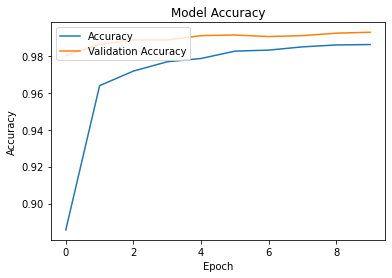

In [6]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


313/313 [==============================] - 1s 3ms/step


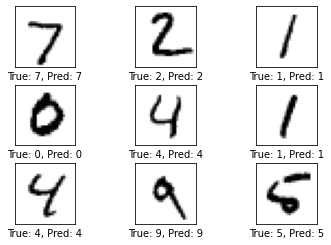

In [7]:
# Predict the test set
predictions = model.predict(test_X)
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28, 28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(np.argmax(cls_true[i]))
        else:
            xlabel = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i]), cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Select a few images from test set
images = test_X[:9]

# Get the true classes for those images
cls_true = test_y[:9]

# Get the predicted classes for those images
cls_pred = np.argmax(predictions[:9], axis=1)

# Plot the images and labels using our helper function
plot_images(images, cls_true, cls_pred)


# KNN

In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.datasets import mnist


In [10]:
# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape the data to two dimensions
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

# Normalize the data
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255


In [11]:
# Initialize KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(train_X, train_y)


KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict the test set
pred_y = knn.predict(test_X)

# Evaluate the model
print("Classification Report:")
print(classification_report(test_y, pred_y))
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y))
print("Accuracy Score:")
print(accuracy_score(test_y, pred_y))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7

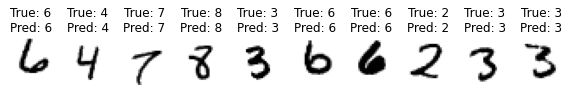

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
def plot_images(images, labels_true, labels_pred):
    assert len(images) == len(labels_true) == len(labels_pred)
    fig, axes = plt.subplots(1, 10, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"True: {labels_true[i]}\nPred: {labels_pred[i]}")
        ax.axis('off')
    plt.show()
# Assuming 'knn' is your trained model and 'test_X' and 'test_y' are already defined

# Select a few images from your test dataset
indices = np.random.choice(range(len(test_X)), 10, replace=False)  # Randomly pick 10 indices
sample_images = test_X[indices]
sample_labels_true = test_y[indices]

# Predict labels for these images
sample_labels_pred = knn.predict(sample_images)

# Plot
plot_images(sample_images, sample_labels_true, sample_labels_pred)


# SVM

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


In [15]:
# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape data to 2D
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

# Normalize data
train_X = train_X / 255.0
test_X = test_X / 255.0


In [16]:
# Create a classifier: a support vector classifier
svm_classifier = svm.SVC(gamma=0.05, kernel='poly', degree=3, C=2)

# Train the classifier on the training data
svm_classifier.fit(train_X, train_y)


SVC(C=2, gamma=0.05, kernel='poly')

In [21]:
# Predict the labels for the test set
predicted = svm_classifier.predict(test_X)

# Evaluate the model
print("Classification report for classifier %s:\n%s\n"
      % (svm_classifier, metrics.classification_report(test_y, predicted)))
print("Confusion Matrix:\n", metrics.confusion_matrix(test_y, predicted))
print("Accuracy Score:")
print(accuracy_score(test_y, predicted))

Classification report for classifier SVC(C=2, gamma=0.05, kernel='poly'):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8

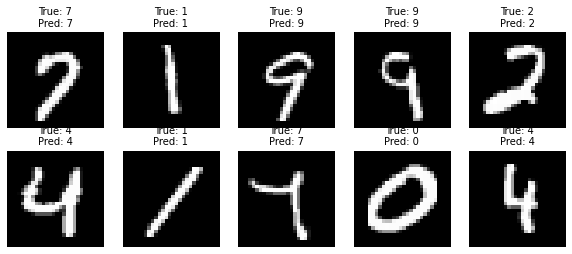

In [22]:
def plot_images(images, actual_labels, predicted_labels):
    plt.figure(figsize=(10, 4))
    for index, (image, label_true, label_pred) in enumerate(zip(images, actual_labels, predicted_labels)):
        plt.subplot(2, 5, index + 1)
        plt.axis('off')
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.title(f'True: {label_true}\nPred: {label_pred}', fontsize=10)
    plt.show()

# Pick random indices to plot
sample_index = np.random.choice(len(test_X), 10, replace=False)

# Select corresponding images and labels
sample_images = test_X[sample_index]
sample_actual_labels = test_y[sample_index]
sample_predicted_labels = predicted[sample_index]

# Call the function
plot_images(sample_images, sample_actual_labels, sample_predicted_labels)
